In [1]:
from Loading import DataLoad
from Loading import model_load
from separate import separate_data
import eli5
from eli5.sklearn import PermutationImportance
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [2]:
#Load the data
flags = ['CCO','ICIC','KPI']
data_load =  DataLoad()
data_load.load()
df = data_load.df
cols_to_use = ['cell_id','percentageCentreUsers', 'centre_power_factor', 'ECB', 'antenna_downtilt']

# Separate data into training and validation sets
X_train, X_valid, y_CCO_train_CCO, y_CCO_valid, df = separate_data(df, flags[0])
X_train, X_valid, y__ICIC_train, y_ICIC_valid, df = separate_data(df, flags[1])     
X_train, X_valid, y_train, y_valid, df = separate_data(df, flags[2])
#df.head()
df.describe()

,cell_id,sim_time,centre_SINR_dB,edge_SINR_dB,centre_RSRP_dB,edge_RSRP_dB,interference_level1,interference_level2,interference_level3,interference_level4,...,current_edge_SINR_dB,current_centre_RSRP_dB,current_edge_RSRP_dB,current_interference_level1,current_interference_level2,current_interference_level3,current_interference_level4,current_Intial_Number_Of_UEs,current_percentageCentreUsers,KPI
count,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,...,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06,1.372140e+06
mean,1.300000e+01,1.020000e+02,8.005351e+00,-6.496990e+00,-5.177953e+01,-6.284717e+01,2.227313e+01,3.509228e+00,4.010866e-01,1.090778e-02,...,-6.554581e+00,-5.182790e+01,-6.284330e+01,2.249464e+01,3.541248e+00,4.045943e-01,1.097993e-02,2.872727e+02,5.754889e+01,-8.031539e+00
std,6.055303e+00,5.715478e+01,9.997891e+00,3.185847e+01,6.915855e+00,1.335480e+01,1.500815e+01,3.000445e+00,6.871798e-01,1.059119e-01,...,3.195506e+01,6.914282e+00,1.340019e+01,1.491290e+01,2.993467e+00,6.890223e-01,1.062651e-01,8.801769e+01,2.407469e+01,2.667443e+00
min,3.000000e+00,4.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+02,0.000000e+00,-2.814398e+01
25%,8.000000e+00,5.200000e+01,5.951668e+00,4.058757e-01,-5.506500e+01,-6.309450e+01,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,...,3.763355e-01,-5.509960e+01,-6.306840e+01,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,2.100000e+02,4.000000e+01,-9.604840e+00
50%,1.300000e+01,1.020000e+02,8.985705e+00,3.828115e+00,-5.131060e+01,-5.851550e+01,1.900000e+01,3.000000e+00,0.000000e+00,0.000000e+00,...,3.848070e+00,-5.134930e+01,-5.846510e+01,1.900000e+01,3.000000e+00,0.000000e+00,0.000000e+00,2.800000e+02,5.600000e+01,-7.955940e+00
75%,1.800000e+01,1.520000e+02,1.176150e+01,6.558582e+00,-4.779360e+01,-5.562190e+01,3.100000e+01,5.000000e+00,1.000000e+00,0.000000e+00,...,6.586645e+00,-4.784560e+01,-5.559567e+01,3.100000e+01,5.000000e+00,1.000000e+00,0.000000e+00,3.500000e+02,7.500000e+01,-6.432435e+00
max,2.300000e+01,2.000000e+02,2.595120e+01,2.313900e+01,-2.593210e+01,-3.692930e+01,1.170000e+02,3.100000e+01,8.000000e+00,3.000000e+00,...,2.313900e+01,-2.593210e+01,-3.692930e+01,1.170000e+02,3.100000e+01,8.000000e+00,3.000000e+00,4.500000e+02,1.000000e+02,9.381940e+00


In [3]:
#Load models
CCO_model = model_load(flags[0])
ICIC_model = model_load(flags[1])
ICIC_CCO_model = model_load(flags[2])


In [4]:
perm_CCO = PermutationImportance(CCO_model).fit(X_valid, y_CCO_valid)
weights1 = eli5.explain_weights_df(perm_CCO, feature_names = cols_to_use)
eli5.show_weights(perm_CCO, feature_names = cols_to_use)

Weight,Feature
-0.0010 ± 0.0008,ECB
-0.0038 ± 0.0032,antenna_downtilt
-0.0057 ± 0.0014,centre_power_factor
-0.0124 ± 0.0028,cell_id
-0.0148 ± 0.0027,percentageCentreUsers


In [5]:
perm_ICIC = PermutationImportance(ICIC_model).fit(X_valid, y_ICIC_valid)
weights2 = eli5.explain_weights_df(perm_ICIC, feature_names = cols_to_use)
eli5.show_weights(perm_ICIC, feature_names = cols_to_use)

Weight,Feature
-0.0000 ± 0.0003,ECB
-0.0003 ± 0.0002,percentageCentreUsers
-0.0032 ± 0.0019,cell_id
-0.0039 ± 0.0029,antenna_downtilt
-0.0044 ± 0.0018,centre_power_factor


In [6]:
perm_ICIC_CCO = PermutationImportance(ICIC_CCO_model).fit(X_valid, y_valid)
weights3 = eli5.explain_weights_df(perm_ICIC_CCO, feature_names = cols_to_use)
eli5.show_weights(perm_ICIC_CCO, feature_names = cols_to_use)
## Сделать столб. диаграмму для всех 3-х случаев

Weight,Feature
0.4107 ± 0.0024,cell_id
0.3080 ± 0.0033,percentageCentreUsers
0.2481 ± 0.0021,antenna_downtilt
0.2018 ± 0.0014,centre_power_factor
0.0630 ± 0.0005,ECB


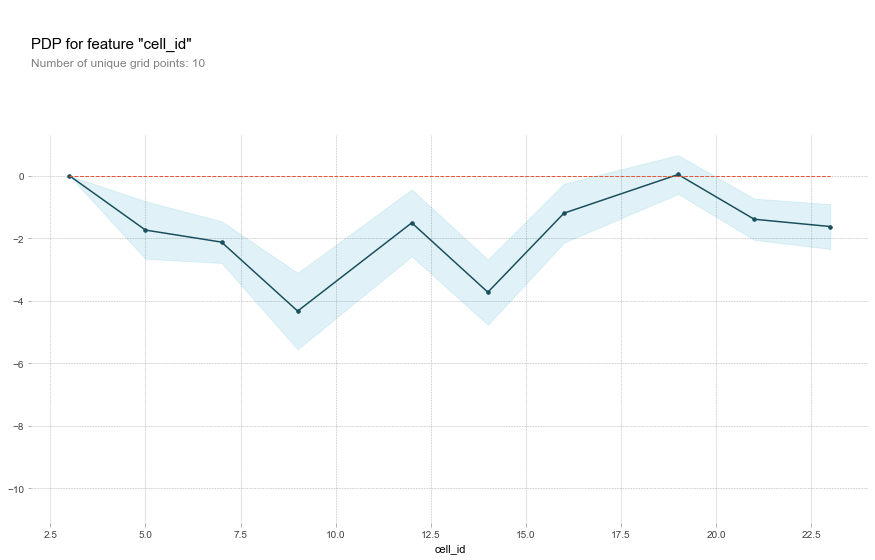

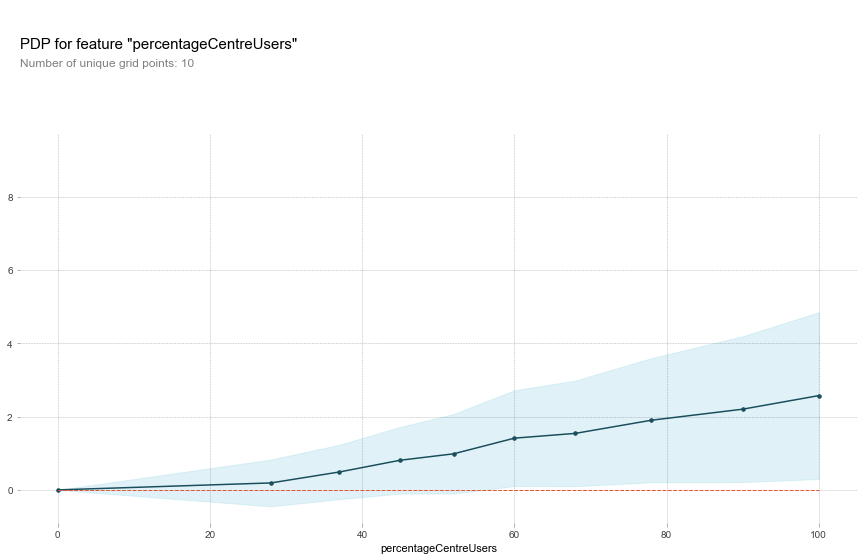

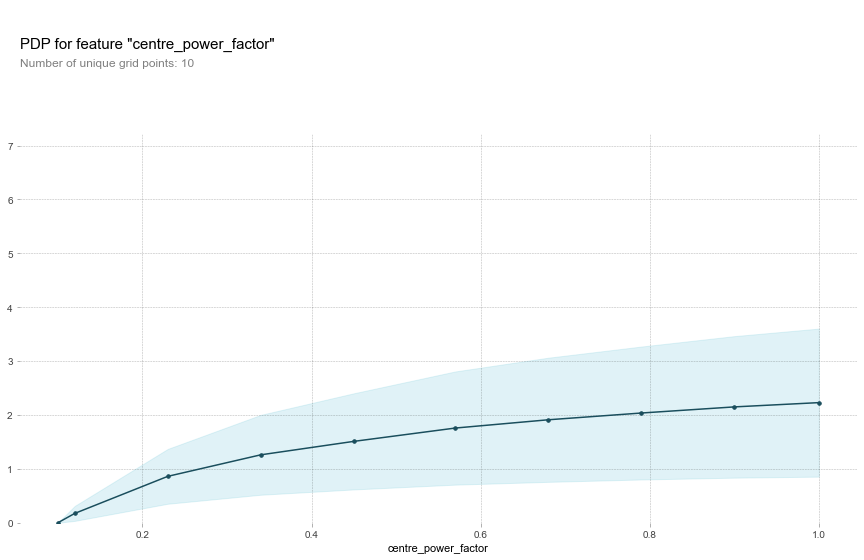

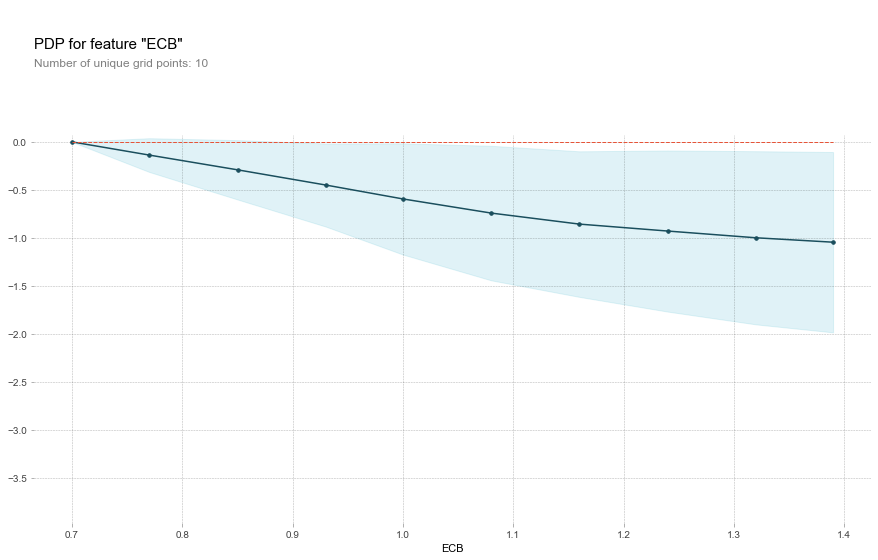

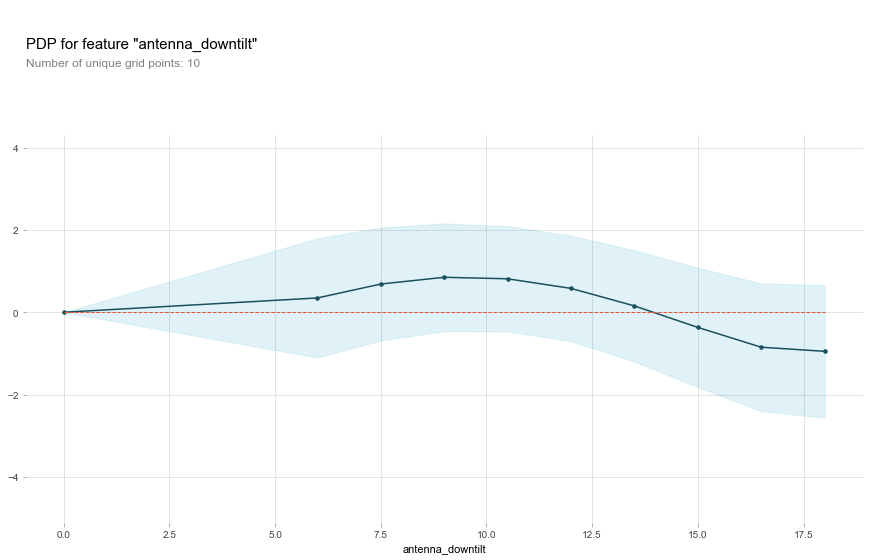

In [7]:
for feat_name in cols_to_use:
    pdp_dist = pdp.pdp_isolate(model=ICIC_CCO_model, dataset=X_valid, model_features=cols_to_use, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

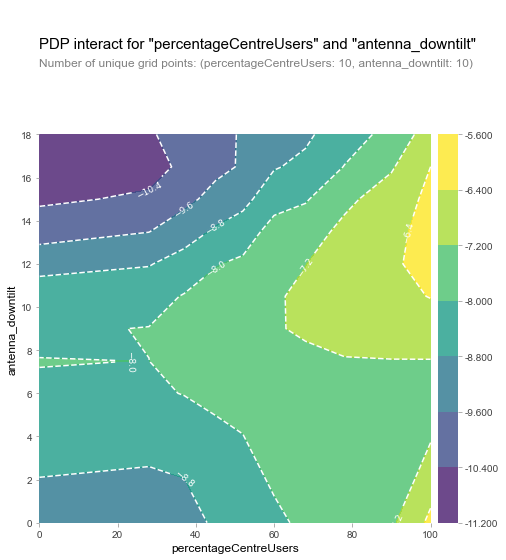

In [8]:
dependence  =  pdp.pdp_interact(model=ICIC_CCO_model, dataset=X_valid, model_features=cols_to_use, features=['percentageCentreUsers', 'antenna_downtilt'])

pdp.pdp_interact_plot(pdp_interact_out=dependence, feature_names=['percentageCentreUsers', 'antenna_downtilt'], plot_type='contour')
plt.show()

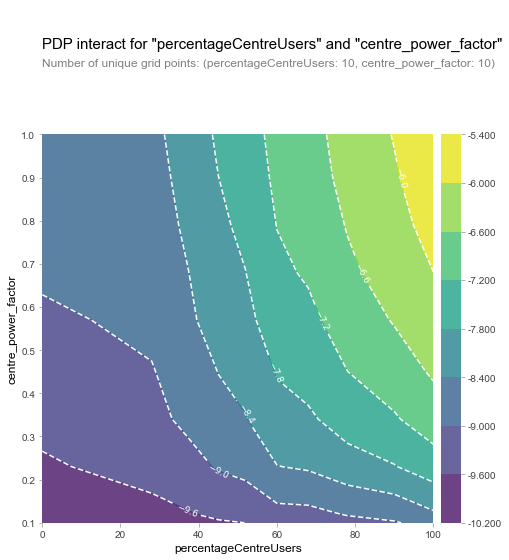

In [9]:
dependence  =  pdp.pdp_interact(model=ICIC_CCO_model, dataset=X_valid, model_features=cols_to_use, features=['percentageCentreUsers', 'centre_power_factor'])

pdp.pdp_interact_plot(pdp_interact_out=dependence, feature_names=['percentageCentreUsers', 'centre_power_factor'], plot_type='contour')
plt.show()

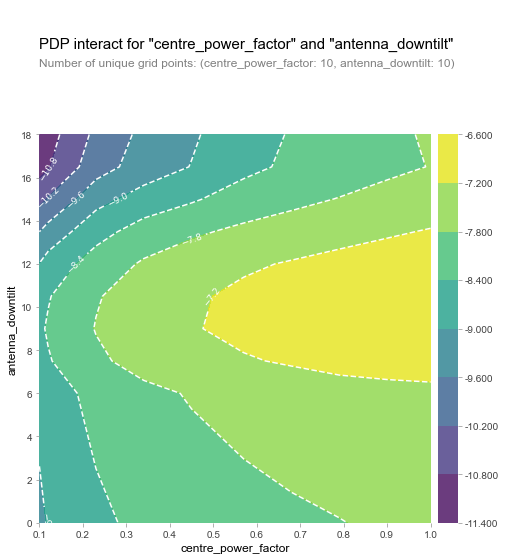

In [10]:
dependence  =  pdp.pdp_interact(model=ICIC_CCO_model, dataset=X_valid, model_features=cols_to_use, features=['centre_power_factor', 'antenna_downtilt'])

pdp.pdp_interact_plot(pdp_interact_out=dependence, feature_names=['centre_power_factor', 'antenna_downtilt'], plot_type='contour')
plt.show()

In [11]:
import shap

explainer = shap.TreeExplainer(ICIC_CCO_model)
shap_values = explainer.shap_values(X_valid)



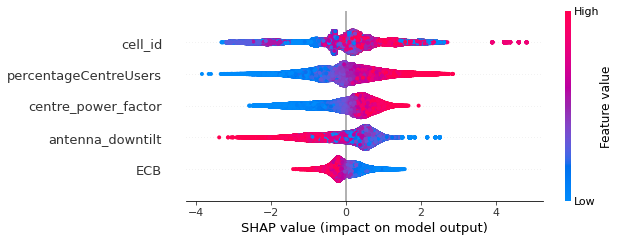

In [12]:
shap.summary_plot(shap_values, X_valid)

In [13]:
data = X_valid.iloc[:1000]
shap_values1 = explainer.shap_values(data)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values1, data)

In [14]:
data = X_valid.iloc[1:2]
shap_values2 = explainer.shap_values(data)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values2, data)

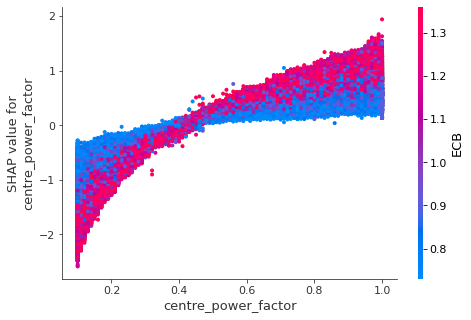

In [15]:
shap.dependence_plot("centre_power_factor", shap_values, X_valid)


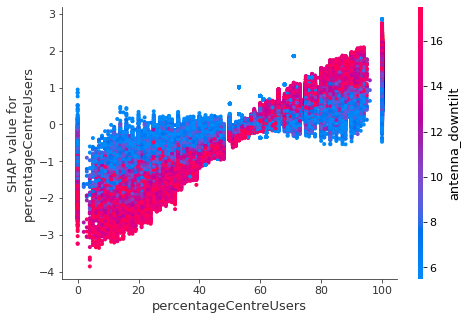

In [16]:
shap.dependence_plot("percentageCentreUsers", shap_values, X_valid)

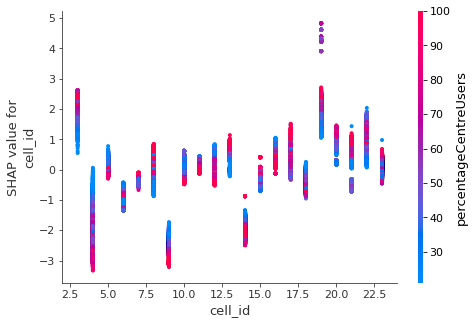

In [17]:
shap.dependence_plot("cell_id", shap_values, X_valid)